In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import scipy.optimize
import sklearn

In [2]:
def weather_generation(P, x0):
    x = x0
    while True:
        yield x
        x = np.random.choice([0,1,2],p=P[x])
P = np.array([[0.2,0.6,0.2],[0.3,0.2,0.5],[0.1,0.4,0.5]])

generator = weather_generation(P, 0)
events = [next(generator) for _ in range(10)]

In [3]:
events

[0, 1, 2, 1, 2, 1, 1, 2, 1, 2]

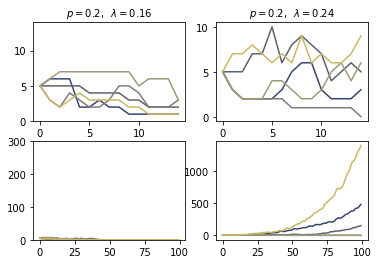

In [4]:
def repidemic(x0, r, d, n, ω):
  # Simulate n timesteps
    x = x0
    res = [x]
    for _ in range(n-1):
        x = x + ω.poisson(x*r/d) - ω.binomial(x, 1/d)
        res.append(x)
    return np.array(res)

# Simulate 5 epidemics each, at two different parameter values
θ = [(0.8,5),(1.2,5)]
M = 5
rng = np.random.default_rng(1642)
xss = [[repidemic(5,r=r,d=d,n=1000,ω=np.random.default_rng(rng.integers(2000))) for _ in range(M)] for (r,d) in θ]
# Plot them
cmap = plt.get_cmap('cividis')
cols = [cmap(c) for c in np.linspace(.2,.8,M)]

fig,axes = plt.subplots(2,2, figsize=(6,4))
for xs,(r,d,),(ax1,ax2) in zip(xss,θ,axes.T):
    for x,c in zip(xs, cols):
        T = 15
        ax1.plot(np.arange(15), x[:15], color=c)
        ax2.plot(np.arange(100), x[:100], color=c)
        ax1.set_title(f'$p={1/d},\;\;λ={r/d}$', fontsize=10)

axes[0,0].set_ylim([0,14])  
axes[1,0].set_ylim([0,300])
        
plt.show()

In [5]:
P = np.array([[0.2,0.6,0.2],[0.3,0.2,0.5],[0.1,0.4,0.5]])

In [6]:
P @P

array([[0.24, 0.32, 0.44],
       [0.17, 0.42, 0.41],
       [0.19, 0.34, 0.47]])

In [7]:
np.linalg.matrix_power(P,100)

array([[0.19230769, 0.36538462, 0.44230769],
       [0.19230769, 0.36538462, 0.44230769],
       [0.19230769, 0.36538462, 0.44230769]])

In [9]:
n = 3
Q = np.concatenate([(P-np.eye(n)).transpose(), [np.ones(n)]])
b = np.zeros(n+1)
b[-1] = 1
pi = np.linalg.lstsq(Q, b)[0]
pi

<ipython-input-9-3b838376fe0b>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pi = np.linalg.lstsq(Q, b)[0]


array([0.19230769, 0.36538462, 0.44230769])

In [10]:
# Adjacency matrix (including a link from state 5 back to itself)
E = np.array([[0,1,0,0,1,0],
              [1,0,0,0,1,1],
              [0,1,0,1,0,0],
              [0,0,1,0,1,1],
              [0,0,0,1,0,0],
              [0,0,0,0,0,1]])
# Transition matrix
P = E / E.sum(axis=1)[:,np.newaxis]
P

array([[0.        , 0.5       , 0.        , 0.        , 0.5       ,
        0.        ],
       [0.33333333, 0.        , 0.        , 0.        , 0.33333333,
        0.33333333],
       [0.        , 0.5       , 0.        , 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.33333333,
        0.33333333],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [11]:
Q = P.copy()

In [12]:
Q[0] = np.zeros(len(P))
Q

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , 0.        , 0.33333333,
        0.33333333],
       [0.        , 0.5       , 0.        , 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.33333333,
        0.33333333],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [13]:
Q[-1] = np.zeros(len(P))
Q

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.33333333, 0.        , 0.        , 0.        , 0.33333333,
        0.33333333],
       [0.        , 0.5       , 0.        , 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.33333333,
        0.33333333],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [14]:
b = np.zeros(len(P))
b[0] = 1

In [15]:
pi = np.linalg.solve(np.eye(6)-Q,b)

In [16]:
pi

array([1.   , 0.375, 0.25 , 0.125, 0.125, 0.   ])